## Problem Statement
The classification goal is to predict if the client will subscribe a term deposit using any classification algorithm along with the application of PCA. Find out the optimal number of components and draw a 3D plot of 3 PC’s.

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

In [28]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [29]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [33]:
bank['outcome'] = bank.y.map({'no':0, 'yes':1})

In [22]:
bank['outcome'].head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

In [8]:
job_dummies = pd.get_dummies(bank.job, prefix='job')
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)

In [38]:
bank.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [36]:
bank['default'] = bank.default.map({'no':0, 'unknown':1, 'yes':1})

In [39]:
bank['contact'] = bank.contact.map({'cellular':0, 'telephone':1,'unknown':1})

In [41]:
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix='poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis=1, inplace=True)

In [42]:
bank = pd.concat([bank, job_dummies, poutcome_dummies], axis=1)

In [43]:
feature_cols = ['default', 'contact', 'previous'] + list(bank.columns[-13:])
x = bank[feature_cols]
# create y
y = bank.outcome 

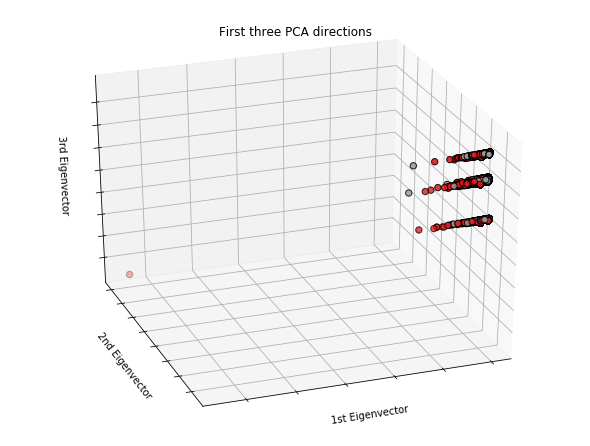

In [45]:
# For better understanding plot the first three PCA dimensions 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
x_reduced = PCA(n_components=3).fit_transform(bank[feature_cols])
ax.scatter(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st Eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()